## Practical Work 3
prepared by Dr. Hattem el-attar

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20,200)
x

array([ 0.        ,  0.10050251,  0.20100503,  0.30150754,  0.40201005,
        0.50251256,  0.60301508,  0.70351759,  0.8040201 ,  0.90452261,
        1.00502513,  1.10552764,  1.20603015,  1.30653266,  1.40703518,
        1.50753769,  1.6080402 ,  1.70854271,  1.80904523,  1.90954774,
        2.01005025,  2.11055276,  2.21105528,  2.31155779,  2.4120603 ,
        2.51256281,  2.61306533,  2.71356784,  2.81407035,  2.91457286,
        3.01507538,  3.11557789,  3.2160804 ,  3.31658291,  3.41708543,
        3.51758794,  3.61809045,  3.71859296,  3.81909548,  3.91959799,
        4.0201005 ,  4.12060302,  4.22110553,  4.32160804,  4.42211055,
        4.52261307,  4.62311558,  4.72361809,  4.8241206 ,  4.92462312,
        5.02512563,  5.12562814,  5.22613065,  5.32663317,  5.42713568,
        5.52763819,  5.6281407 ,  5.72864322,  5.82914573,  5.92964824,
        6.03015075,  6.13065327,  6.23115578,  6.33165829,  6.4321608 ,
        6.53266332,  6.63316583,  6.73366834,  6.83417085,  6.93

In [3]:
y = -2*x +1
y

array([ 1.00000000e+00,  7.98994975e-01,  5.97989950e-01,  3.96984925e-01,
        1.95979899e-01, -5.02512563e-03, -2.06030151e-01, -4.07035176e-01,
       -6.08040201e-01, -8.09045226e-01, -1.01005025e+00, -1.21105528e+00,
       -1.41206030e+00, -1.61306533e+00, -1.81407035e+00, -2.01507538e+00,
       -2.21608040e+00, -2.41708543e+00, -2.61809045e+00, -2.81909548e+00,
       -3.02010050e+00, -3.22110553e+00, -3.42211055e+00, -3.62311558e+00,
       -3.82412060e+00, -4.02512563e+00, -4.22613065e+00, -4.42713568e+00,
       -4.62814070e+00, -4.82914573e+00, -5.03015075e+00, -5.23115578e+00,
       -5.43216080e+00, -5.63316583e+00, -5.83417085e+00, -6.03517588e+00,
       -6.23618090e+00, -6.43718593e+00, -6.63819095e+00, -6.83919598e+00,
       -7.04020101e+00, -7.24120603e+00, -7.44221106e+00, -7.64321608e+00,
       -7.84422111e+00, -8.04522613e+00, -8.24623116e+00, -8.44723618e+00,
       -8.64824121e+00, -8.84924623e+00, -9.05025126e+00, -9.25125628e+00,
       -9.45226131e+00, -

#### Plot your data points. 

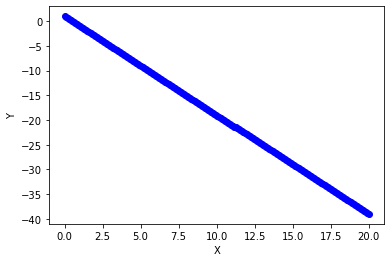

In [4]:
plt.scatter(x,y,color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Step_1:** Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def GD(X,Y,alpha=0.001,itr=1000):
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    for i in range(itr):
        h = theta_0 + theta_1*X
        h_pre.append(h)
        j_cost = (1/(2*len(X)))*sum((h-Y)**2)
        loss.append(j_cost)
        g0 = (1/len(X))*sum(h-Y)
        g1=(1/len(X))*sum((h-Y)*X)
        theta_0 = theta_0 - alpha*g0
        theta_1 = theta_1 - alpha*g1
        thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre    
        
    
Thetas , Loss , h_pred = GD(x,y)

In [8]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(0.09982883130671616)
print(index_of_loss) 
lis = Thetas[999]
print(Thetas[999])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

0.09982883130671616
999
[0.10990709052049685, -1.9332853288125282]


In [9]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9985182099382712


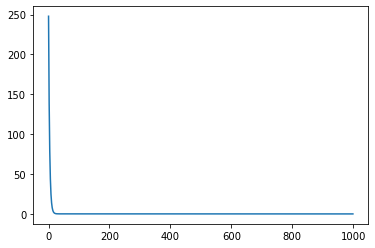

In [10]:
plt.plot(Loss)
plt.show()

In [11]:
_Thetas= np.array(Thetas)

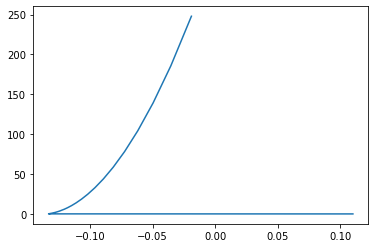

In [12]:
plt.plot(_Thetas[:,0],Loss)
plt.show()

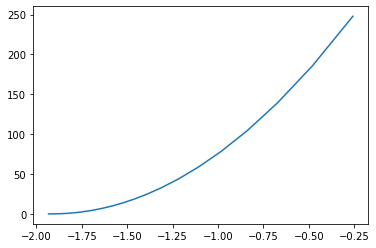

In [13]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

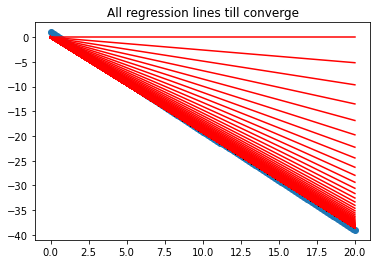

In [14]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

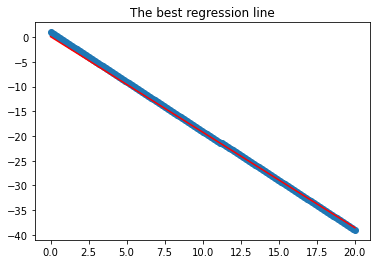

In [15]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

### **Step_2:** Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

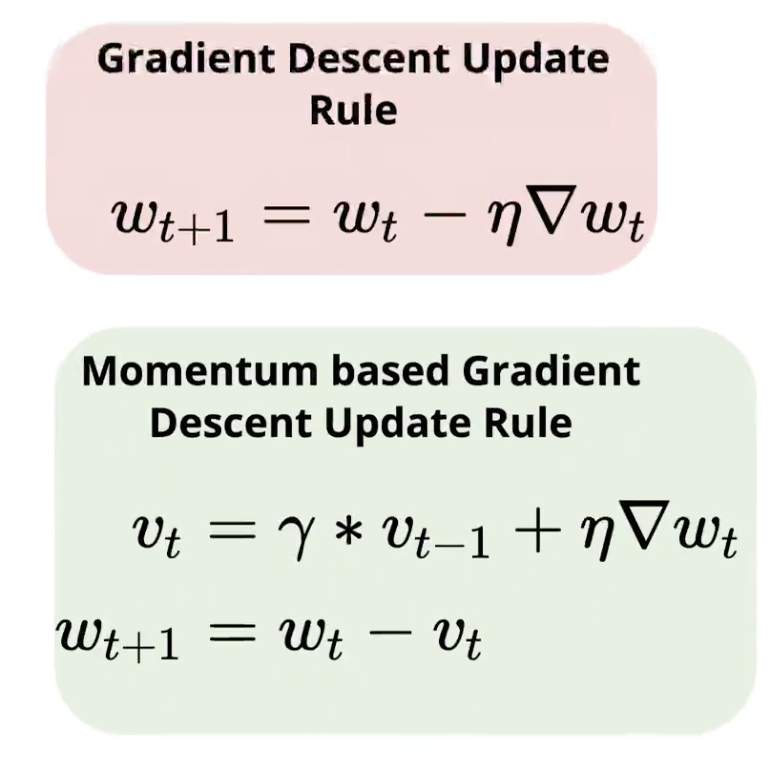

In [16]:
def GD(X,Y,gamma,alpha=0.01,itr=500):
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    vt0 = 0
    vt1 = 0
    for i in range(itr):
        h = theta_0 + theta_1*X
        h_pre.append(h)
        j_cost = (1/(2*len(X)))*sum((h-Y)**2)
        loss.append(j_cost)
        g0 = (1/len(X))*sum(h-Y)
        g1=(1/len(X))*sum((h-Y)*X)
        vt0 = gamma*vt0+alpha*g0
        vt1 = gamma*vt1+alpha*g1
        theta_0 = theta_0 - vt0
        theta_1 = theta_1 - vt1
        thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre    
        
    
Thetas , Loss , h_pred = GD(x,y,0.9)

In [19]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(1.975502468704938e-18)
print(index_of_loss) 
lis = Thetas[499]
print(Thetas[499])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

1.975502468704938e-18
499
[0.9999999961981542, -1.999999999722873]


In [20]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 1.0


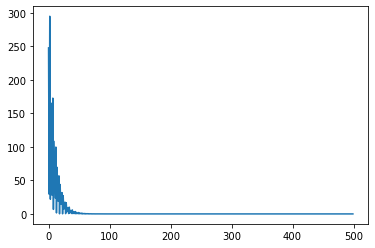

In [21]:
plt.plot(Loss)
plt.show()

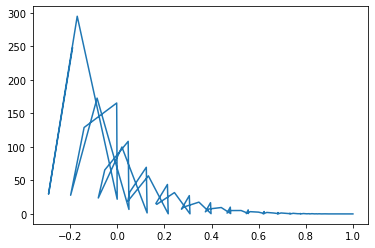

In [22]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

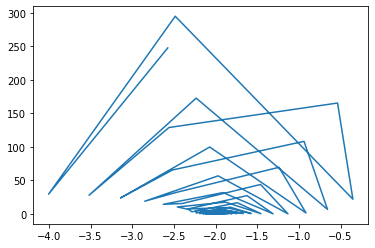

In [23]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

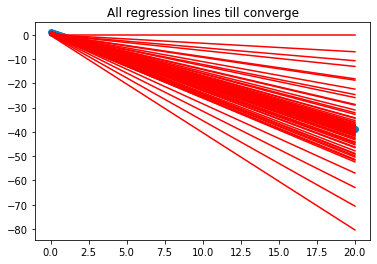

In [24]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

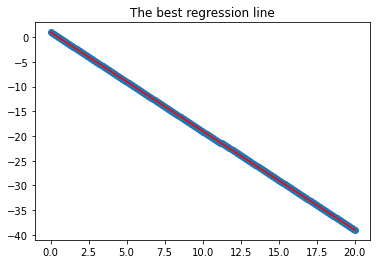

In [25]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

#### **Step_3:** Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [26]:
Thetas , Loss , h_pred = GD(x,y,0)

In [29]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(0.013478432749769034)
print(index_of_loss) 
lis = Thetas[499]
print(Thetas[499])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

0.013478432749769034
499
[0.6736777587909483, -1.9755413386719916]


In [30]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9998008366856256


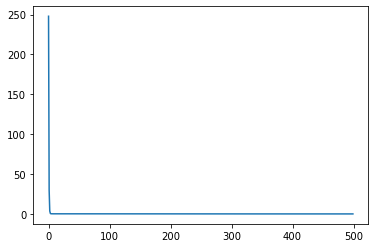

In [31]:
plt.plot(Loss)
plt.show()

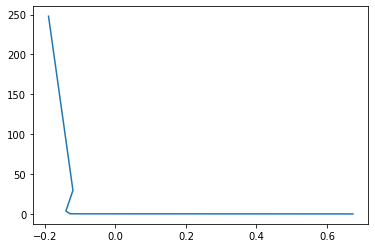

In [32]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

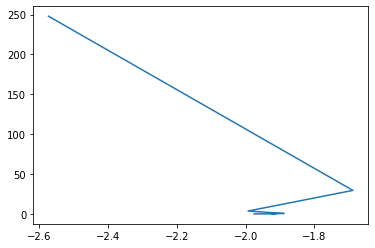

In [33]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

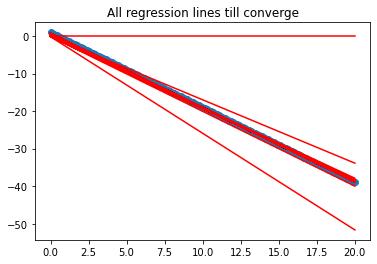

In [34]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

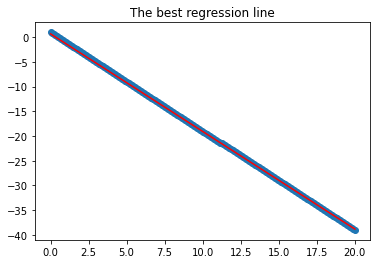

In [35]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

# Try momentum = 0.99999

In [36]:
Thetas , Loss , h_pred = GD(x,y,0.99999)

In [39]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(0.09099165805853801)
print(index_of_loss) 
lis = Thetas[110]
print(Thetas[110])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

0.09099165805853801
110
[0.2934817868523316, 0.2812875265212802]


In [40]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: -3.929781381253627


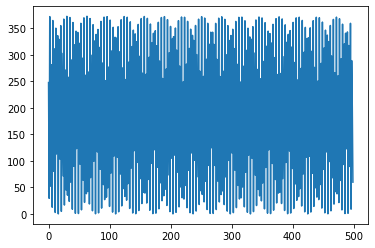

In [41]:
plt.plot(Loss)
plt.show()

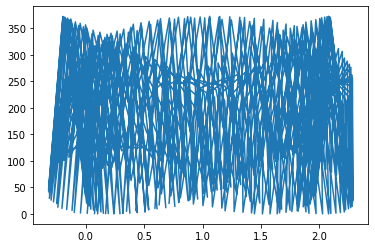

In [42]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

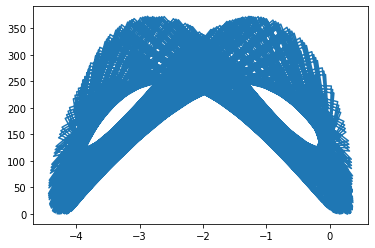

In [43]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

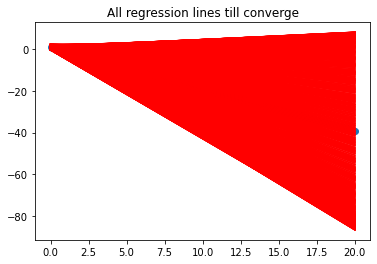

In [44]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

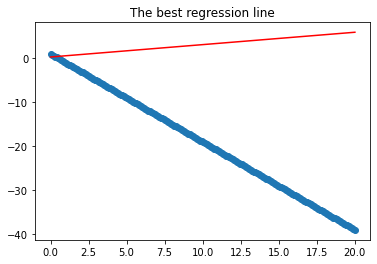

In [45]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

### Try momentum = 0.000009

In [51]:
Thetas , Loss , h_pred = GD(x,y,0.000001)

In [54]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(0.013478398955606957)
print(index_of_loss) 
lis = Thetas[499]
print(Thetas[499])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

0.013478398955606957
499
[0.6736781687027681, -1.9755413693958992]


In [55]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 0.9998008371859858


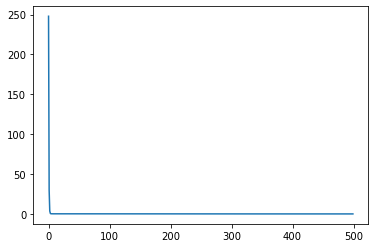

In [56]:
plt.plot(Loss)
plt.show()

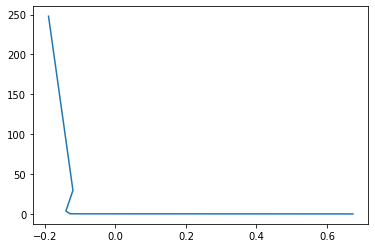

In [57]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

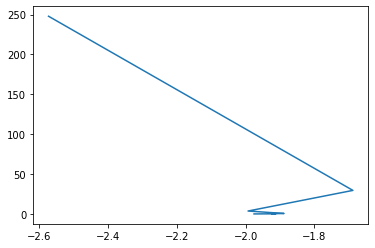

In [58]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

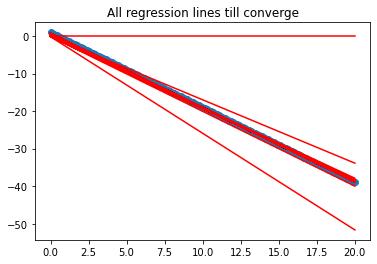

In [59]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

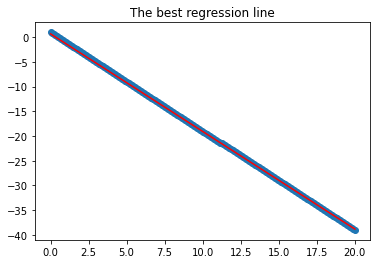

In [60]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

### **Step_4: **Update your Batch GD for one variable  implementation to be NAG and check your results

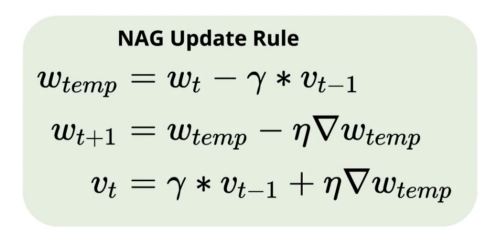

In [63]:
def NAG_GD(X,Y,gamma,alpha=0.01,itr=500):
    theta_0 =0
    theta_1 = 0
    thetas=[]
    loss=[]
    h_pre=[]
    vt0 = 0
    vt1 = 0
    t0_tmp = 0
    t1_tmp = 0 
    
    for i in range(itr):
        t0_tmp=theta_0-gamma*vt0
        t1_tmp=theta_1-gamma*vt1
        h = theta_0 + theta_1*X
        h_pre.append(h)
        j_cost = sum((h-Y)**2)
        loss.append(j_cost)
        g0 = (1/len(X))*sum(h-Y)
        g1=(1/len(X))*sum((h-Y)*X)
        vt0 = gamma*vt0+alpha*g0
        vt1 = gamma*vt1+alpha*g1
        theta_0 = theta_0 - vt0
        theta_1 = theta_1 - vt1
        thetas.append([theta_0,theta_1])
        
    return thetas,loss,h_pre    
        
    
Thetas , Loss , h_pred = NAG_GD(x,y,0.9)

In [67]:
Opt_loss = min(Loss)
print(Opt_loss)
index_of_loss = Loss.index(7.902009874819751e-16)
print(index_of_loss) 
lis = Thetas[499]
print(Thetas[499])
opt_theta_0 = lis[0]
opt_theta_1 = lis[1]

7.902009874819751e-16
499
[0.9999999961981542, -1.999999999722873]


In [68]:
y_predict = opt_theta_0 + opt_theta_1 * x
y_mean = np.mean(y)
SStot = np.sum((y - y_mean)**2)
SSres = np.sum((y - y_predict)**2)
R2 = 1 - (SSres / SStot)
print(f"R2: {R2}")

R2: 1.0


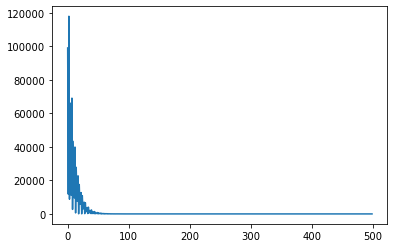

In [69]:
plt.plot(Loss)
plt.show()

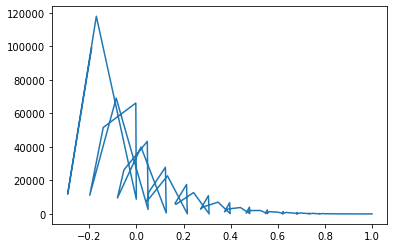

In [70]:
_Thetas= np.array(Thetas)
plt.plot(_Thetas[:,0],Loss)
plt.show()

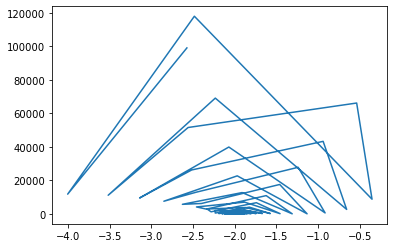

In [71]:
plt.plot(_Thetas[:,1],Loss)
plt.show()

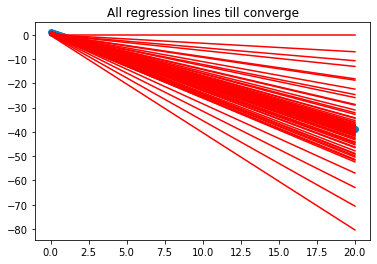

In [72]:
plt.scatter(x,y)
for i in range(0,len(h_pred)):
    plt.plot(x,h_pred[i],color='red',label='model')
plt.title("All regression lines till converge")
plt.show()

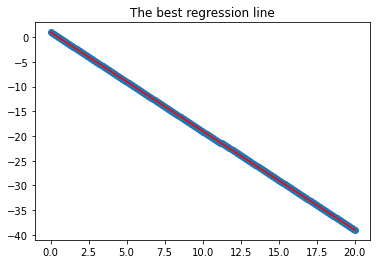

In [73]:
plt.scatter(x,y,label='observed data')
plt.plot(x,y_predict,color='red',label='model')
plt.title("The best regression line")
plt.show()

## Congratulations 
